# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [47]:
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{BASE_URL}&q={city.replace(" ", "+")}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | assab
Processing Record 5 of Set 1 | tambopata
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | mirnyy
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | whyalla stuart
City not found. Skipping...
Processing Record 11 of Set 1 | akure
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | el nido
Processing Record 14 of Set 1 | toliara
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | pedernales
Processing Record 17 of Set 1 | arkhangel'sk
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | fort bragg
Processing Record 39 of Set 4 | vorgashor
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | funafuti
Processing Record 42 of Set 4 | taltal
Processing Record 43 of Set 4 | sinop
Processing Record 44 of Set 4 | tolanaro
Processing Record 45 of Set 4 | revda
Processing Record 46 of Set 4 | 'afak
City not found. Skipping...
Processing Record 47 of Set 4 | port saint john's
Processing Record 48 of Set 4 | lang son
Processing Record 49 of Set 4 | yicheng
Processing Record 0 of Set 5 | pibor
City not found. Skipping...
Processing Record 1 of Set 5 | jayapura
Processing Record 2 of Set 5 | awjilah
Processing Record 3 of Set 5 | jose maria morelos
Processing Record 4 of Set 5 | oodweyne
Processing Record 5 of Set 5 | dwarka
Processing Record 6 of Set 5 | constantia
Processing Record 7 of Set 5 | nyurba
Processing Record 8 of Set 5 | shawnee
Processing Record 9 of Set 5 | ulaangom
Processing Record 10 of Set 5 | tionk essil
Process

Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | zyrya
Processing Record 30 of Set 8 | camiri
Processing Record 31 of Set 8 | noyabrsk
Processing Record 32 of Set 8 | egilsstadir
Processing Record 33 of Set 8 | altay
Processing Record 34 of Set 8 | kuqa
Processing Record 35 of Set 8 | vila velha
Processing Record 36 of Set 8 | klyuchi
Processing Record 37 of Set 8 | torre del campo
Processing Record 38 of Set 8 | kourou
Processing Record 39 of Set 8 | sabang
Processing Record 40 of Set 8 | beledweyne
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | manta
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | al jawf
Processing Record 45 of Set 8 | tokoname
Processing Record 46 of Set 8 | bolobo
Processing Record 47 of Set 8 | prince rupert
Processing Record 48 of Set 8 | coahuayana de hidalgo
Processing Record 49 of Set 8 | juneau
Processing Record 0 of Set 9 | geraldton
Processing Record 1 of Set 9 | yelizovo
Processin

Processing Record 18 of Set 12 | solapur
Processing Record 19 of Set 12 | salmon arm
Processing Record 20 of Set 12 | antofagasta
Processing Record 21 of Set 12 | taesal-li
Processing Record 22 of Set 12 | al aaroui
Processing Record 23 of Set 12 | ocean city
Processing Record 24 of Set 12 | perry
Processing Record 25 of Set 12 | le vauclin
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | debipur
-----------------------------
Data Retrieval Complete      


In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ta`u,-14.2336,-169.5144,299.59,80,100,9.40,AS,1697670156
1,constitucion,-35.3333,-72.4167,284.78,79,24,1.17,CL,1697670734
2,puerto ayora,-0.7393,-90.3518,297.34,95,87,3.58,EC,1697670736
3,assab,13.0092,42.7394,301.87,74,3,10.21,ER,1697670737
4,tambopata,-12.7333,-69.1833,301.09,78,0,0.00,PE,1697670737


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,299.59,80,100,9.40,AS,1697670156
1,constitucion,-35.3333,-72.4167,284.78,79,24,1.17,CL,1697670734
2,puerto ayora,-0.7393,-90.3518,297.34,95,87,3.58,EC,1697670736
3,assab,13.0092,42.7394,301.87,74,3,10.21,ER,1697670737
4,tambopata,-12.7333,-69.1833,301.09,78,0,0.00,PE,1697670737


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

TypeError: 'str' object is not callable

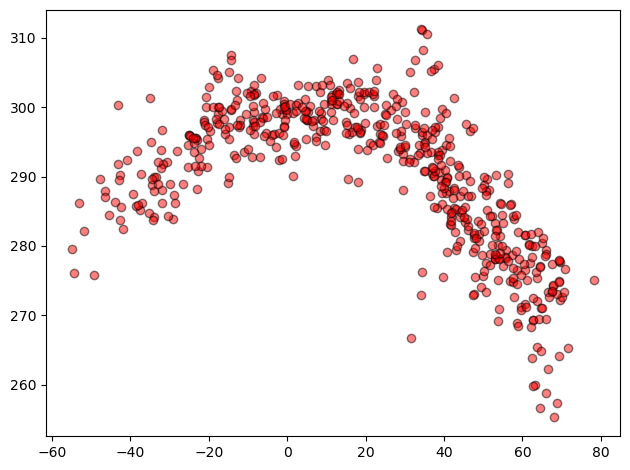

In [130]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties
plt.title("Hey")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

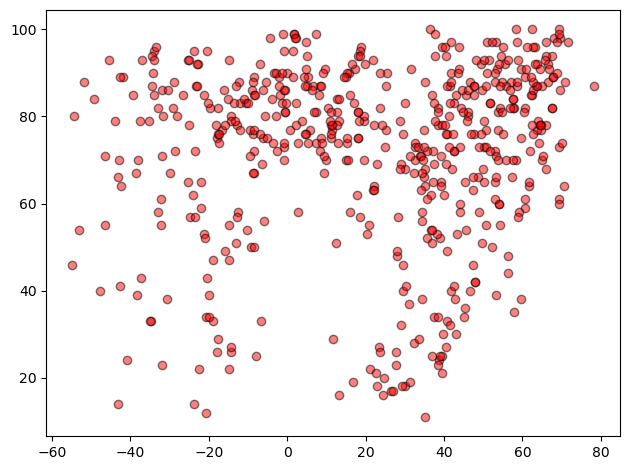

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

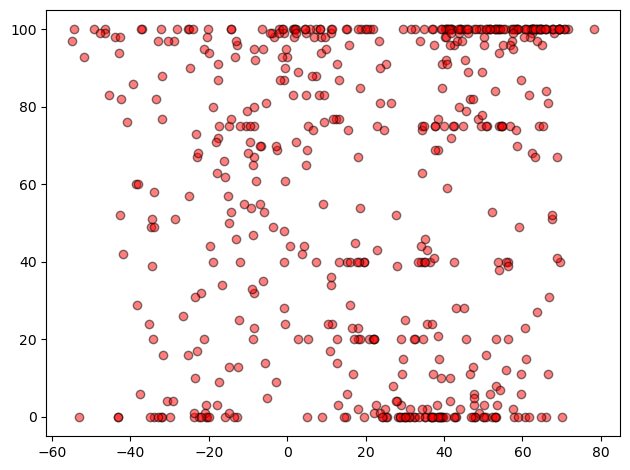

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

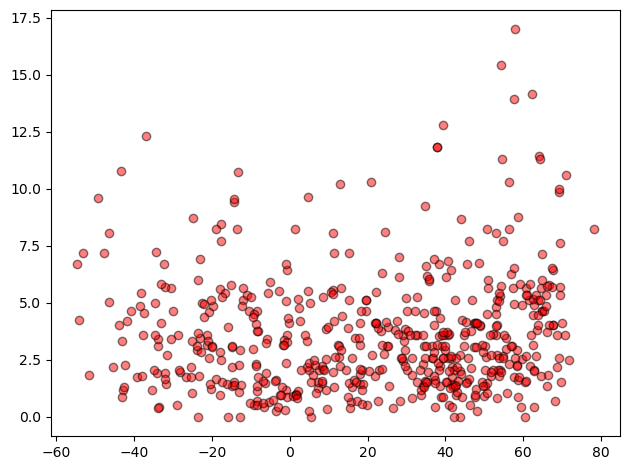

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,assab,13.0092,42.7394,301.87,74,3,10.21,ER,1697670737
6,mirnyy,62.5353,113.9611,263.84,85,68,3.13,RU,1697670738
9,akure,7.2526,5.1931,295.70,99,100,1.27,NG,1697670740
10,iqaluit,63.7506,-68.5145,272.00,92,100,5.14,CA,1697670740
11,el nido,11.1858,119.3956,300.91,75,34,1.97,PH,1697670741


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,299.59,80,100,9.40,AS,1697670156
1,constitucion,-35.3333,-72.4167,284.78,79,24,1.17,CL,1697670734
2,puerto ayora,-0.7393,-90.3518,297.34,95,87,3.58,EC,1697670736
4,tambopata,-12.7333,-69.1833,301.09,78,0,0.00,PE,1697670737
5,avarua,-21.2078,-159.7750,298.18,53,20,3.60,CK,1697670738


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is 0.73


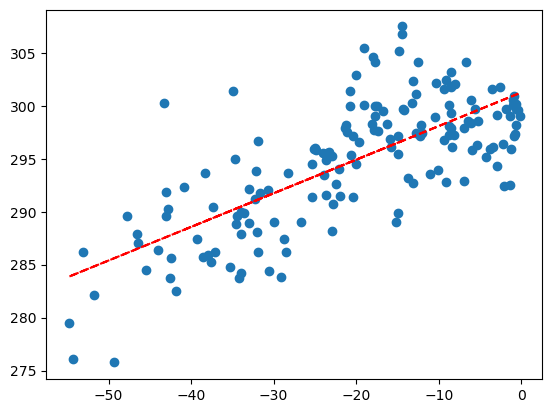

In [122]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))

The r-value between Lat and Max Temp is 0.73


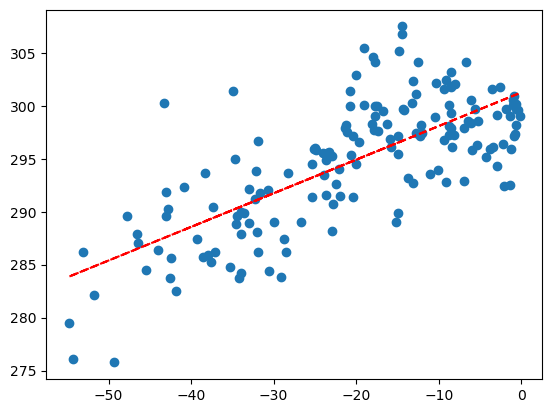

In [123]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.18


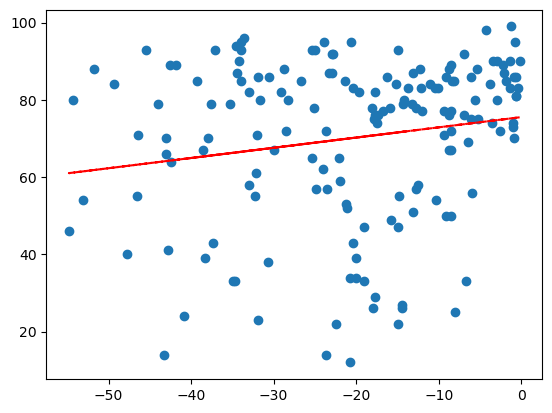

In [124]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))

The r-value between Lat and Humidity is 0.18


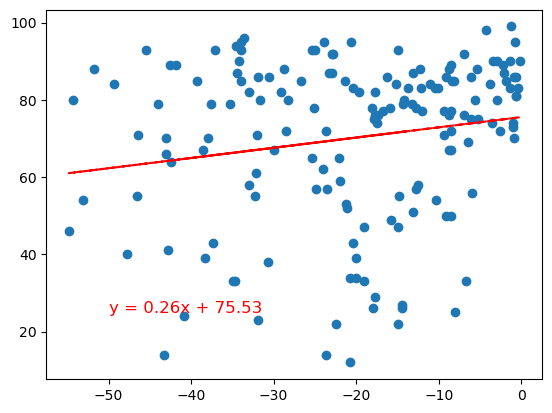

In [125]:
# Southern Hemisphere
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.05


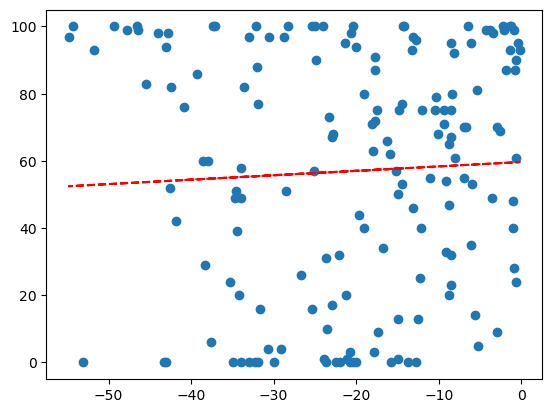

In [126]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))

The r-value between Lat and Cloudiness is 0.05


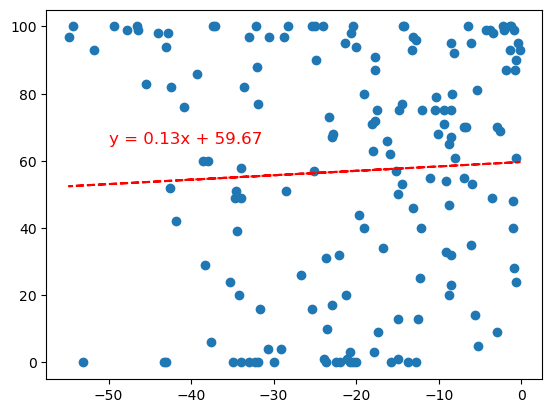

In [127]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.22


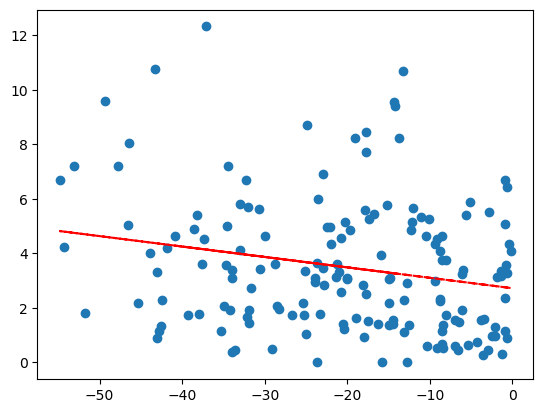

In [128]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))

The r-value between Lat and Wind Speed is -0.22


TypeError: 'str' object is not callable

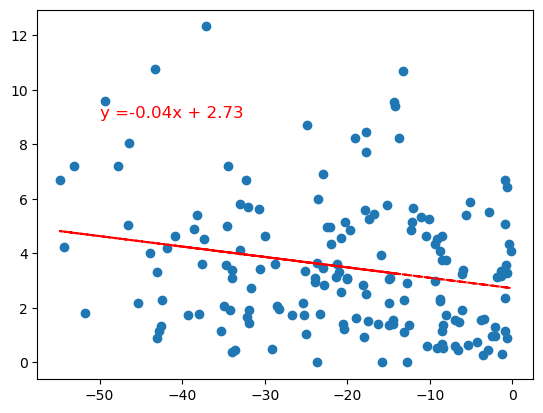

In [131]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel("Hey")

**Discussion about the linear relationship:** YOUR RESPONSE HERE